In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
# 파일 업로드 기능 실행 
from google.colab import files
uploaded = files.upload() 

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving datatry1.csv to datatry1.csv
User uploaded file "datatry1.csv" with length 14839 bytes


In [0]:
print(pd.__version__)
# 한글이 깨져서 encodin 지정함 
df = pd.read_csv('datatry1.csv', parse_dates =["date"], index_col ="date", engine='python',encoding='euc-kr', dtype={'tpi':'float'}) 
  
df.head()

0.25.3


,tpi,tb3,tb5,tb10,cb3,cd91,cr,br,cpi,si,tl,m2,unemr
date,,,,,,,,,,,,,
2006-01-01,58.0,5.02,5.29,5.58,5.50,4.15,3.74,3.75,79.306,1399.83,617446.1,1027697.4,3.8
2006-02-01,59.0,4.87,5.03,5.28,5.33,4.25,3.92,4.00,79.464,1371.59,623634.3,1034711.9,4.1
2006-03-01,60.4,4.93,5.13,5.42,5.30,4.27,3.97,4.00,79.934,1359.60,628647.7,1042293.6,3.9
2006-04-01,61.0,4.95,5.16,5.45,5.24,4.33,3.97,4.00,80.013,1419.73,638214.3,1048598.6,3.5
2006-05-01,61.0,4.78,4.93,5.20,5.05,4.36,3.96,4.00,80.169,1317.70,645478.6,1055855.4,3.2


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 164 entries, 2006-01-01 to 2019-08-01
Data columns (total 13 columns):
tpi      164 non-null float64
tb3      164 non-null float64
tb5      164 non-null float64
tb10     164 non-null float64
cb3      164 non-null float64
cd91     164 non-null float64
cr       164 non-null float64
br       164 non-null float64
cpi      164 non-null float64
si       164 non-null float64
tl       164 non-null float64
m2       164 non-null float64
unemr    164 non-null float64
dtypes: float64(13)
memory usage: 17.9 KB


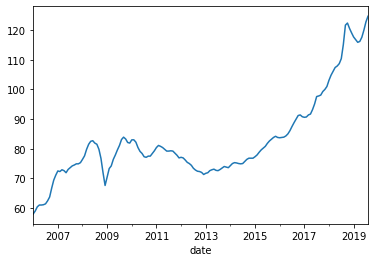

In [0]:
df['tpi'].plot()

In [0]:
df

,tpi,tb3,tb5,tb10,cb3,cd91,cr,br,cpi,si,tl,m2,unemr
date,,,,,,,,,,,,,
2006-01-01,58.0,5.02,5.29,5.58,5.50,4.15,3.74,3.75,79.306,1399.83,617446.1,1027697.4,3.8
2006-02-01,59.0,4.87,5.03,5.28,5.33,4.25,3.92,4.00,79.464,1371.59,623634.3,1034711.9,4.1
2006-03-01,60.4,4.93,5.13,5.42,5.30,4.27,3.97,4.00,79.934,1359.60,628647.7,1042293.6,3.9
2006-04-01,61.0,4.95,5.16,5.45,5.24,4.33,3.97,4.00,80.013,1419.73,638214.3,1048598.6,3.5
2006-05-01,61.0,4.78,4.93,5.20,5.05,4.36,3.96,4.00,80.169,1317.70,645478.6,1055855.4,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,116.2,1.74,1.77,1.89,2.21,1.89,1.75,1.75,104.870,2203.59,1627414.0,2763058.0,4.4
2019-05-01,117.6,1.68,1.72,1.83,2.15,1.84,1.75,1.75,105.050,2041.74,1637077.7,2771633.0,4.0
2019-06-01,120.0,1.50,1.53,1.62,2.00,1.80,1.76,1.75,104.880,2130.62,1643100.4,2799248.0,4.0


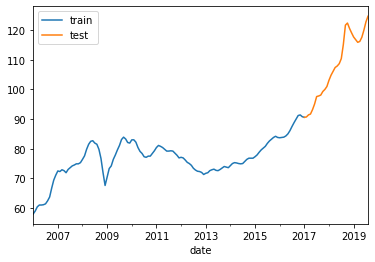

In [0]:
# 2017/1/1 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.
split_date = pd.Timestamp('01-01-2017')


train = df.loc[:split_date, ['tpi']]
test = df.loc[split_date:, ['tpi']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [0]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.        ],
       [0.02994012],
       [0.07185629],
       [0.08982036],
       [0.08982036],
       [0.09281437],
       [0.10179641],
       [0.13173653],
       [0.17065868],
       [0.26047904],
       [0.34131737],
       [0.39221557],
       [0.43413174],
       [0.42814371],
       [0.44610778],
       [0.43712575],
       [0.41616766],
       [0.4491018 ],
       [0.46706587],
       [0.48502994],
       [0.49401198],
       [0.50598802],
       [0.50598802],
       [0.51796407],
       [0.5508982 ],
       [0.58682635],
       [0.65269461],
       [0.70359281],
       [0.73353293],
       [0.73952096],
       [0.71556886],
       [0.70359281],
       [0.65269461],
       [0.55988024],
       [0.41616766],
       [0.28742515],
       [0.37125749],
       [0.45808383],
       [0.48502994],
       [0.5508982 ],
       [0.59580838],
       [0.64670659],
       [0.69161677],
       [0.75149701],
       [0.7754491 ],
       [0.75748503],
       [0.72155689],
       [0.715

In [0]:
train_sc_df = pd.DataFrame(train_sc, columns=['tpi'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['tpi'], index=test.index)
train_sc_df.head()

,tpi
date,
2006-01-01,0.000000
2006-02-01,0.029940
2006-03-01,0.071856
2006-04-01,0.089820
2006-05-01,0.089820


In [0]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['tpi'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['tpi'].shift(s)

train_sc_df.head(13)

,tpi,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
2006-01-01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-01,0.029940,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,0.071856,0.029940,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,0.089820,0.071856,0.029940,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,0.089820,0.089820,0.071856,0.029940,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-01,0.092814,0.089820,0.089820,0.071856,0.029940,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-01,0.101796,0.092814,0.089820,0.089820,0.071856,0.029940,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-01,0.131737,0.101796,0.092814,0.089820,0.089820,0.071856,0.029940,0.000000,NaN,NaN,NaN,NaN,NaN
2006-09-01,0.170659,0.131737,0.101796,0.092814,0.089820,0.089820,0.071856,0.029940,0.000000,NaN,NaN,NaN,NaN


In [0]:
X_train = train_sc_df.dropna().drop('tpi', axis=1)
y_train = train_sc_df.dropna()[['tpi']]

X_test = test_sc_df.dropna().drop('tpi', axis=1)
y_test = test_sc_df.dropna()[['tpi']]



X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,
2007-01-01,0.392216,0.341317,0.260479,0.170659,0.131737,0.101796,0.092814,0.089820,0.089820,0.071856,0.029940,0.000000
2007-02-01,0.434132,0.392216,0.341317,0.260479,0.170659,0.131737,0.101796,0.092814,0.089820,0.089820,0.071856,0.029940
2007-03-01,0.428144,0.434132,0.392216,0.341317,0.260479,0.170659,0.131737,0.101796,0.092814,0.089820,0.089820,0.071856
2007-04-01,0.446108,0.428144,0.434132,0.392216,0.341317,0.260479,0.170659,0.131737,0.101796,0.092814,0.089820,0.089820
2007-05-01,0.437126,0.446108,0.428144,0.434132,0.392216,0.341317,0.260479,0.170659,0.131737,0.101796,0.092814,0.089820


In [0]:
y_train.head()

,tpi
date,
2007-01-01,0.434132
2007-02-01,0.428144
2007-03-01,0.446108
2007-04-01,0.437126
2007-05-01,0.416168


In [0]:
print(type(X_train))
X_train = X_train.values
print(type(X_train))
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
#print(X_train)
print(y_train.shape)
#print(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(121, 12)
(121, 1)


In [0]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("final DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

final DATA
(121, 12, 1)
[[[0.39221557]
  [0.34131737]
  [0.26047904]
  ...
  [0.07185629]
  [0.02994012]
  [0.        ]]

 [[0.43413174]
  [0.39221557]
  [0.34131737]
  ...
  [0.08982036]
  [0.07185629]
  [0.02994012]]

 [[0.42814371]
  [0.43413174]
  [0.39221557]
  ...
  [0.08982036]
  [0.08982036]
  [0.07185629]]

 ...

 [[0.99401198]
  [0.95808383]
  [0.92215569]
  ...
  [0.76946108]
  [0.77245509]
  [0.78443114]]

 [[1.        ]
  [0.99401198]
  [0.95808383]
  ...
  [0.77245509]
  [0.76946108]
  [0.77245509]]

 [[0.98203593]
  [1.        ]
  [0.99401198]
  ...
  [0.7754491 ]
  [0.77245509]
  [0.76946108]]]
[[0.43413174]
 [0.42814371]
 [0.44610778]
 [0.43712575]
 [0.41616766]
 [0.4491018 ]
 [0.46706587]
 [0.48502994]
 [0.49401198]
 [0.50598802]
 [0.50598802]
 [0.51796407]
 [0.5508982 ]
 [0.58682635]
 [0.65269461]
 [0.70359281]
 [0.73353293]
 [0.73952096]
 [0.71556886]
 [0.70359281]
 [0.65269461]
 [0.55988024]
 [0.41616766]
 [0.28742515]
 [0.37125749]
 [0.45808383]
 [0.48502994]
 [0.

In [0]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Using TensorFlow backend.








Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [0]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=500,
          batch_size=30, verbose=1) #, callbacks=[early_stop])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/500





121/121 [==============================] - 1s 8ms/step - loss: 0.3459
Epoch 2/500
121/121 [==============================] - 0s 387us/step - loss: 0.2709
Epoch 3/500
121/121 [==============================] - 0s 313us/step - loss: 0.2063
Epoch 4/500
121/121 [==============================] - 0s 363us/step - loss: 0.1501
Epoch 5/500
121/121 [==============================] - 0s 335us/step - loss: 0.1008
Epoch 6/500
121/121 [==============================] - 0s 357us/step - loss: 0.0618
Epoch 7/500
121/121 [==============================] - 0s 341us/step - loss: 0.0327
Epoch 8/500
121/121 [==============================] - 0s 327us/step - loss: 0.0150
Epoch 9/500
121/121 [==============================] - 0s 355us/step - loss: 0.0156
Epoch 10/500
121/121 [==============================] - 0s 323us/step - loss: 0.0199
Epoch 11/500
121/121 [==============================] - 0s 

In [0]:
score = model.evaluate(X_test_t, y_test, batch_size = 30)
print(score)

20/20 [==============================] - 0s 4ms/step
0.3572414517402649


In [0]:
train_sc_df.describe()

,tpi,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,133.000000,132.000000,131.000000,130.000000,129.000000,128.000000,127.000000,126.000000,125.000000,124.000000,123.000000,122.000000,121.000000
mean,0.562694,0.559563,0.556338,0.552925,0.549506,0.546314,0.543354,0.540657,0.538251,0.536073,0.534030,0.532051,0.530064
std,0.195638,0.193009,0.190146,0.186811,0.183410,0.180497,0.178067,0.176154,0.174773,0.173769,0.172977,0.172287,0.171594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.452096,0.451347,0.450599,0.449850,0.449102,0.449102,0.449102,0.449102,0.449102,0.448353,0.447605,0.446856,0.446108
50%,0.565868,0.564371,0.562874,0.562874,0.562874,0.562874,0.562874,0.561377,0.559880,0.555389,0.550898,0.550898,0.550898
75%,0.691617,0.684880,0.682635,0.679641,0.670659,0.670659,0.670659,0.669162,0.664671,0.655689,0.652695,0.652695,0.652695
max,1.000000,1.000000,1.000000,0.994012,0.958084,0.922156,0.883234,0.841317,0.808383,0.787425,0.784431,0.784431,0.784431


In [0]:
test_sc_df.describe()

,tpi,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,32.000000,31.000000,30.000000,29.000000,28.000000,27.000000,26.000000,25.000000,24.000000,23.000000,22.000000,21.000000,20.000000
mean,1.487275,1.470833,1.455190,1.441359,1.429106,1.417498,1.405343,1.391138,1.374626,1.354856,1.331247,1.302823,1.272605
std,0.332916,0.324942,0.318404,0.314735,0.313388,0.313164,0.312803,0.310576,0.305841,0.296620,0.280612,0.253017,0.217259
min,0.976048,0.976048,0.976048,0.976048,0.976048,0.976048,0.976048,0.976048,0.976048,0.976048,0.976048,0.976048,0.976048
25%,1.198353,1.196108,1.193862,1.191617,1.190120,1.188623,1.187126,1.185629,1.166916,1.148204,1.129491,1.110778,1.096557
50%,1.486527,1.479042,1.459581,1.440120,1.420659,1.401198,1.375749,1.350299,1.318862,1.287425,1.272455,1.257485,1.247006
75%,1.785180,1.772455,1.755988,1.742515,1.735778,1.723054,1.676647,1.568862,1.530689,1.505988,1.490269,1.479042,1.449850
max,1.997006,1.940120,1.928144,1.928144,1.928144,1.928144,1.928144,1.928144,1.928144,1.928144,1.928144,1.907186,1.712575


Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

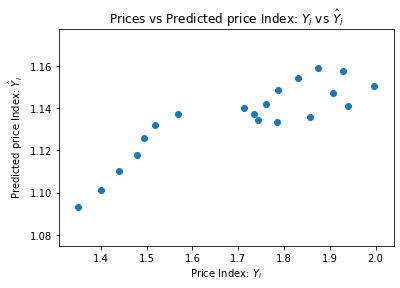

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_t, batch_size=30)
plt.scatter(y_test, y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")